In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Created on Sat Jun 08 15:26:55 2019
@author: saviokay, chamara rajapakshe, jianwu wang
"""

'\nCreated on Sat Jun 08 15:26:55 2019\n@author: saviokay, chamara rajapakshe, jianwu wang\n'

In [0]:
%matplotlib inline

In [0]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def readData(file):
    f=h5py.File(file,'r')
    CF=f['CF'][:]
    lo=f['lat_bnd'][:]
    la=f['lon_bnd'][:]
    f.close()
    return CF,lo,la

In [0]:
def doPlot(results,benchmark,fig_ttl,vmin=-1,vmax=1,bty=None):
    '''
    results,benchmark:180*360 array
    '''
    X={}
    X['rwDay']=results
    X['bmDay']=benchmark
    fig1,ax1=plt.subplots(3,1,figsize=(6,10))
    fig1.suptitle(fig_ttl)
    cm1=ax1[0].imshow(X['rwDay'],extent=(-180,180,-90,90))
    cm2=ax1[1].imshow(X['bmDay'],extent=(-180,180,-90,90))
    if bty is None:
        bias=X['rwDay']-X['bmDay']
        ax1[2].set_title('Bias')
    elif bty=='relative':
        bias=(X['rwDay']-X['bmDay'])/X['bmDay']
        ax1[2].set_title('Relative bias')   
    cm3=ax1[2].imshow(bias,vmin = -np.nanmax(np.absolute(bias)), vmax=np.nanmax(np.absolute(bias)),extent=(-180,180,-90,90),cmap=plt.cm.seismic)
    ax1[0].set_title('Results')
    ax1[1].set_title('Benchmark')

    fig1.colorbar(cm1,ax=ax1[0])
    fig1.colorbar(cm2,ax=ax1[1])
    fig1.colorbar(cm3,ax=ax1[2])
    fig1.show()
    print('Maximum bias:%0.4f'%(np.nanmax(bias)))
    print('Minimum bias:%0.4f'%(np.nanmin(bias)))
    print('Maximum absolute bias:%0.4f'%(np.nanmax(np.absolute(bias))))
    print('Minimum absolute bias:%0.4f'%(np.nanmin(np.absolute(bias))))
    return fig1,fig_ttl
    
def bias_hist(RES,BMK,range=None):
  vals = (RES-BMK)/BMK
  fig,ax = plt.subplots()
  if range is None:
    ax.hist(vals.flatten(),bins=50)
  else:
    ax.hist(vals.flatten(),bins=50,range=range)
  print('Mean relative bias: %f'%(np.mean(vals)))
  print('Mean absolute relative bias: %f'%(np.mean(abs(vals))))
  return fig,ax

### Comparison Between With No Subsampling & With 2 Subsampling With 8 Nodes Environment

Maximum bias:0.0411
Minimum bias:-0.0358
Maximum absolute bias:0.0411
Minimum absolute bias:0.0000


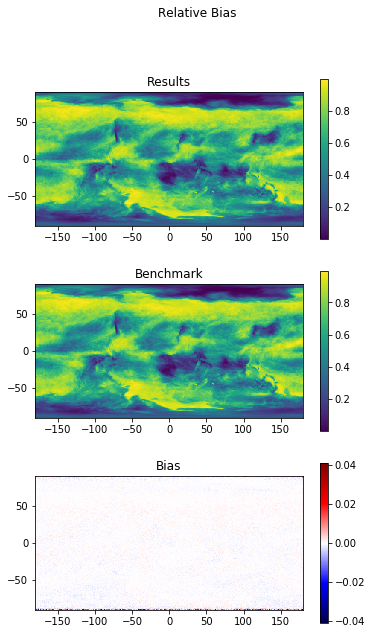

In [7]:
f=h5py.File('nonsub8n_onemonth.hdf','r')
BMK=f['__xarray_dataarray_variable__'][:]
f.close()
f=h5py.File('twosub8n_onemonth.hdf','r')
RES=f['__xarray_dataarray_variable__'][:]
f.close()

bias=RES-BMK
fig1,fig1_ttl=doPlot(RES,BMK,'Relative Bias',vmin=-0.01,vmax=0.01)

Mean relative bias: -0.000354
Mean absolute relative bias: 0.001801


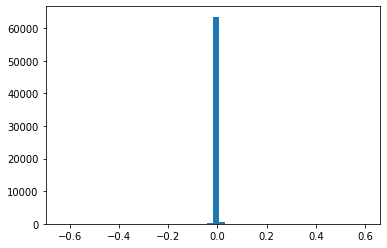

In [8]:
fig,ax = bias_hist(RES,BMK)

Mean relative bias: -0.000354
Mean absolute relative bias: 0.001801


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f01cae33b00>)

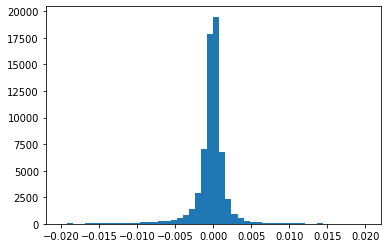

In [9]:
bias_hist(RES,BMK,range=[-0.02,0.02])

Maximum bias:0.5999
Minimum bias:-0.6359
Maximum absolute bias:0.6359
Minimum absolute bias:0.0000


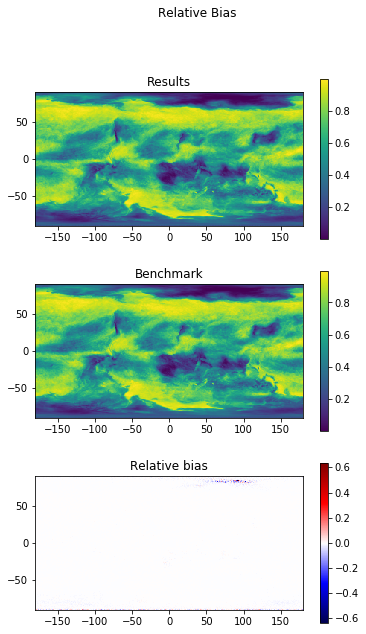

In [10]:
fig1,fig1_ttl=doPlot(RES,BMK,'Relative Bias',vmin=-0.01,vmax=0.01,bty='relative')

Mean relative bias: -0.000354
Mean absolute relative bias: 0.001801


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f01c92ad860>)

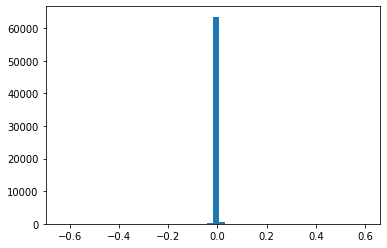

In [11]:
bias_hist(RES,BMK)

In [12]:
BMK

array([[0.98417924, 0.31319196, 0.31538053, ..., 0.30333361, 0.30501728,
        0.31314094],
       [0.31309511, 0.31596915, 0.31289151, ..., 0.30527705, 0.30481275,
        0.30963289],
       [0.30800481, 0.31197903, 0.31404203, ..., 0.30274921, 0.30086014,
        0.30268232],
       ...,
       [0.30162361, 0.29817786, 0.30038718, ..., 0.29950198, 0.30138332,
        0.3013795 ],
       [0.2744616 , 0.275515  , 0.27441449, ..., 0.27016815, 0.27180566,
        0.26637996],
       [0.25305085, 0.24260958, 0.24980784, ..., 0.25667769, 0.24767646,
        0.22958398]])

In [13]:
RES

array([[0.98405235, 0.31504737, 0.31380894, ..., 0.30127995, 0.3004731 ,
        0.32188841],
       [0.30980963, 0.31703132, 0.31302571, ..., 0.30597968, 0.30189141,
        0.31680774],
       [0.30646881, 0.31148646, 0.31316666, ..., 0.30230601, 0.30094846,
        0.29437632],
       ...,
       [0.29948781, 0.29762566, 0.29844679, ..., 0.29686638, 0.30241486,
        0.30241593],
       [0.27541806, 0.27288777, 0.2771807 , ..., 0.26897336, 0.27026013,
        0.26076013],
       [0.25450763, 0.24248927, 0.27111984, ..., 0.27525773, 0.25895599,
        0.2033195 ]])

In [14]:
((BMK-RES)/BMK)*100

array([[ 0.0128929 , -0.59241915,  0.49831653, ...,  0.67703067,
         1.48980996, -2.793463  ],
       [ 1.04935467, -0.3361607 , -0.04289135, ..., -0.2301626 ,
         0.95840503, -2.31721231],
       [ 0.49869501,  0.15788629,  0.27874456, ...,  0.14639309,
        -0.02935764,  2.74412924],
       ...,
       [ 0.70809992,  0.18519359,  0.64596285, ...,  0.87999633,
        -0.34226755, -0.34389463],
       [-0.34848484,  0.95357251, -1.00804107, ...,  0.44223992,
         0.56861427,  2.10970585],
       [-0.575687  ,  0.04959065, -8.53135862, ..., -7.23866644,
        -4.55413662, 11.44002896]])

In [15]:
data_loss2 = np.mean((BMK-RES)/BMK)
print("The calculated data loss between nonsub8n_onemonth and twosub8n_onemonth files is {} or {} % ".format(data_loss2,data_loss2*100))

The calculated data loss between nonsub8n_onemonth and twosub8n_onemonth files is 0.0003537031499824618 or 0.03537031499824618 % 


In [16]:
data_loss2_absolute = np.mean(np.absolute(BMK-RES)/BMK)
print("The calculated data loss between nonsub8n_onemonth and twosub8n_onemonth files is {} or {} % ".format(data_loss2_absolute,data_loss2_absolute*100))

The calculated data loss between nonsub8n_onemonth and twosub8n_onemonth files is 0.0018007302370746517 or 0.18007302370746517 % 


### Comparison Between With No Subsampling & With 3 Subsampling With 8 Nodes Environment

Maximum bias:1.4574
Minimum bias:-1.0000
Maximum absolute bias:1.4574
Minimum absolute bias:0.0000


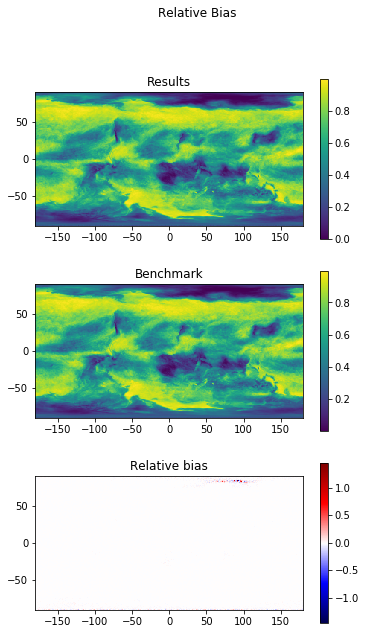

In [17]:
f=h5py.File('nonsub8n_onemonth.hdf','r')
BMK=f['__xarray_dataarray_variable__'][:]
f.close()
f=h5py.File('threesub8n_onemonth.hdf','r')
RES=f['__xarray_dataarray_variable__'][:]
f.close()

bias=RES-BMK
fig1,fig1_ttl=doPlot(RES,BMK,'Relative Bias',vmin=-0.01,vmax=0.01, bty='relative')

Mean relative bias: 0.000549
Mean absolute relative bias: 0.003021


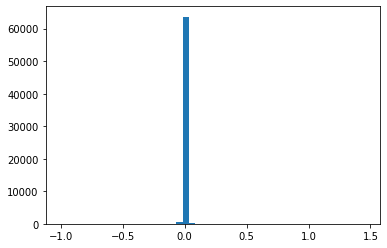

In [18]:
fig,ax = bias_hist(RES,BMK)

In [19]:
data_loss3 = np.mean((RES-BMK)/BMK)
print("The calculated data loss between nonsub8n_onemonth and threesub8n_onemonth files is {} or {} % ".format(data_loss3,data_loss3*100))

The calculated data loss between nonsub8n_onemonth and threesub8n_onemonth files is 0.0005487111883120774 or 0.054871118831207745 % 


In [20]:
data_loss3_absolute = np.mean(np.absolute(RES-BMK)/BMK)
print("The calculated data loss between nonsub8n_onemonth and threesub8n_onemonth files is {} or {} % ".format(data_loss3_absolute,data_loss3_absolute*100))

The calculated data loss between nonsub8n_onemonth and threesub8n_onemonth files is 0.00302135890938001 or 0.30213589093800103 % 


### Comparison Between With No Subsampling & With 4 Subsampling With 8 Nodes Environment

Maximum bias:2.1932
Minimum bias:-1.0000
Maximum absolute bias:2.1932
Minimum absolute bias:0.0000


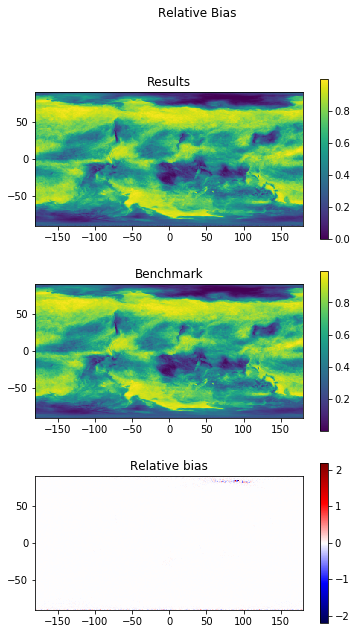

In [21]:
f=h5py.File('nonsub8n_onemonth.hdf','r')
BMK=f['__xarray_dataarray_variable__'][:]
f.close()
f=h5py.File('foursub8n_onemonth.hdf','r')
RES=f['__xarray_dataarray_variable__'][:]
f.close()

bias=BMK-RES
fig1,fig1_ttl=doPlot(RES,BMK,'Relative Bias',vmin=-0.01,vmax=0.01, bty='relative')

Mean relative bias: 0.000222
Mean absolute relative bias: 0.004535


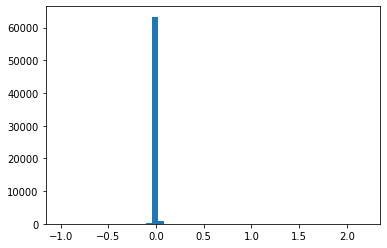

In [22]:
fig2,ax2 = bias_hist(RES,BMK)

Mean relative bias: 0.000222
Mean absolute relative bias: 0.004535


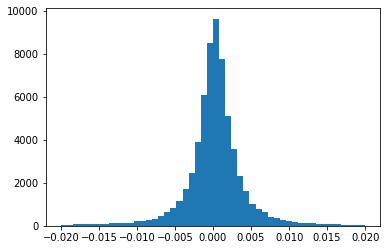

In [23]:
fig3,ax3 = bias_hist(RES,BMK,range=[-0.02,0.02])

In [24]:
data_loss4 = np.mean((RES-BMK)/BMK)
print("The calculated data loss between nonsub8n_onemonth and foursub8n_onemonth files is {} or {} % ".format(data_loss4,data_loss4*100))

The calculated data loss between nonsub8n_onemonth and foursub8n_onemonth files is 0.00022154578382644065 or 0.022154578382644063 % 


In [25]:
data_loss4_absolute = np.mean(np.absolute(RES-BMK)/BMK)
print("The calculated data loss between nonsub8n_onemonth and foursub8n_onemonth files is {} or {} % ".format(data_loss4_absolute,data_loss4_absolute*100))

The calculated data loss between nonsub8n_onemonth and foursub8n_onemonth files is 0.004534924720564185 or 0.45349247205641846 % 


In [26]:
data_loss21 = round((data_loss2*100),4)
data_loss31 = round((data_loss3*100),4)
data_loss41 = round((data_loss4*100),4)
print("The calculated data loss between nonsub8n_onemonth and twosub8n_onemonth files is {} % ".format(data_loss21))
print("The calculated data loss between nonsub8n_onemonth and threesub8n_onemonth files is {} % ".format(data_loss31))
print("The calculated data loss between nonsub8n_onemonth and foursub8n_onemonth files is {} % ".format(data_loss41))

The calculated data loss between nonsub8n_onemonth and twosub8n_onemonth files is 0.0354 % 
The calculated data loss between nonsub8n_onemonth and threesub8n_onemonth files is 0.0549 % 
The calculated data loss between nonsub8n_onemonth and foursub8n_onemonth files is 0.0222 % 


In [27]:
data_loss21_absolute = round((data_loss2_absolute*100),4)
data_loss31_absolute = round((data_loss3_absolute*100),4)
data_loss41_absolute = round((data_loss4_absolute*100),4)
print("The calculated data loss between nonsub8n_onemonth and twosub8n_onemonth files is {} % ".format(data_loss21_absolute))
print("The calculated data loss between nonsub8n_onemonth and threesub8n_onemonth files is {} % ".format(data_loss31_absolute))
print("The calculated data loss between nonsub8n_onemonth and foursub8n_onemonth files is {} % ".format(data_loss41_absolute))

The calculated data loss between nonsub8n_onemonth and twosub8n_onemonth files is 0.1801 % 
The calculated data loss between nonsub8n_onemonth and threesub8n_onemonth files is 0.3021 % 
The calculated data loss between nonsub8n_onemonth and foursub8n_onemonth files is 0.4535 % 
